### 0.Importing important packages

In [103]:
# data loading and computing functionality
import pandas as pd
import numpy as np
import scipy as sp

# datasets in sklearn package
from sklearn import datasets
from sklearn.datasets import load_digits

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#PCA, SVD, LDA
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            

### 1. Loading data, determining samples, attributes, and types of attributes

Use Davis dataset avaialble at the url https://www.rdocumentation.org/packages/car/versions/2.1-6/topics/Davis
    
Description of the data is provided at https://www.rdocumentation.org/packages/car/versions/2.1-6/topics/Davis

Drop rows in the data set with missing values (NA), using dropna(inplace=True) function.

<span style="color:red">**Question 1a:** </span> What does the data capture? <br>

 Data captures 5 properties (sex, weight, height, repwt, repht ) of men and women

<span style="color:red">**Question 1b:** </span> Who are selected as subjects in the study that collected the data? <br>

men and women engaged in regular exercise

<span style="color:red">**Question 1c:** </span> How many data points are in this dataset? <br>

In [104]:
davis_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv')

In [105]:
davis_df.dropna(inplace=True);

In [106]:
davis_df.shape

(181, 6)

181 data points

<span style="color:red">**Question 1d:** </span> How many attributes are in this dataset? <br>

6 attributes

<span style="color:red">**Question 1e:** </span> What type of attributes are present in the dataset? <br> 
       

In [107]:
davis_df.dtypes

Unnamed: 0      int64
sex            object
weight          int64
height          int64
repwt         float64
repht         float64
dtype: object

Numerical and categorical data. 
Weight, Height, repwt, repht : numerical (continuous)
Unnamed : Numerical (discrete)
Sex : categorical (Nominal)

### 2. Generating summary statistics

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

In [108]:
davis_df.drop(columns=davis_df.columns[davis_df.columns.str.contains('unnamed', case=False)], inplace=True)
davis_df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


<span style="color:red">**Question 2a:** </span> What are range of values the numeric attributes take? <br> 
[Hint: Use exclude=object option in describe() function to ignore the attribute sex]

In [109]:
davis_df.describe(exclude=object)

,weight,height,repwt,repht
count,181.000000,181.000000,181.000000,181.000000
mean,66.303867,170.154696,65.679558,168.657459
std,15.340992,12.312069,13.834220,9.394668
min,39.000000,57.000000,41.000000,148.000000
25%,56.000000,164.000000,55.000000,161.000000
50%,63.000000,169.000000,63.000000,168.000000
75%,75.000000,178.000000,74.000000,175.000000
max,166.000000,197.000000,124.000000,200.000000


Weight : 166-39 = 127 ; Height : 197-57 = 140 ; repwt : 124-41 = 83 ; repht : 200-148 = 52

<span style="color:red">**Question 2b:** </span> What different values do categorical attributes take? <br> 
[Hint: Use include=object option in describe() function to ignore the attribute sex]

In [110]:
davis_df.describe(include= object)

,sex
count,181
unique,2
top,F
freq,99


2 unique values (M and F)

<span style="color:red">**Question 2c:** </span> What are the mean values for each of the numeric attributes? <br> 

In [111]:
from pandas.api.types import is_numeric_dtype

for col in davis_df.columns:
    if is_numeric_dtype(davis_df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % davis_df[col].mean())

weight:
	 Mean = 66.30
height:
	 Mean = 170.15
repwt:
	 Mean = 65.68
repht:
	 Mean = 168.66


<span style="color:red">**Question 2d:** </span> What is the variance for each of the numeric attributes? <br> 

In [112]:
from pandas.api.types import is_numeric_dtype

for col in davis_df.columns:
    if is_numeric_dtype(davis_df[col]):
        print('%s:' % (col))
        print('\t Variance = %.2f' % davis_df[col].var())

weight:
	 Variance = 235.35
height:
	 Variance = 151.59
repwt:
	 Variance = 191.39
repht:
	 Variance = 88.26


<span style="color:red">**Question 2e:** </span> Visually examine how the attribute weight is distributed and comment if the data is Normally distributed? 

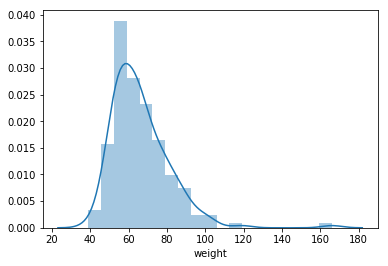

In [113]:
sns.distplot(davis_df['weight']);

Yes, it's a normal distribution

<span style="color:red">**Question 2f:** </span> Visually examine how the attribute height is distributed and comment if the data is Normally distributed? 

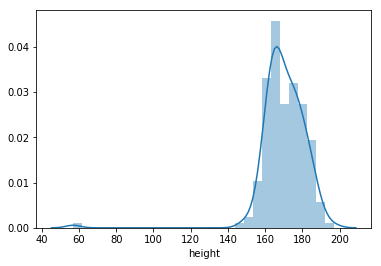

In [114]:
sns.distplot(davis_df['height']);

Yes, it's a normal distribution  

<span style="color:red">**Question 2g:** </span> Visually examine how the attribute repwt is distributed and comment if the data is Normally distributed? 

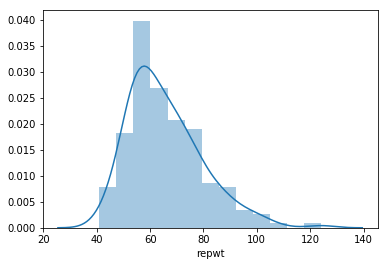

In [115]:
sns.distplot(davis_df['repwt']);

Yes, Normal Distribution  

<span style="color:red">**Question 2h:** </span> Visually examine how the attribute repht is distributed and comment if the data is Normally distributed? 

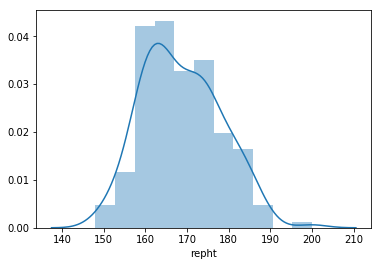

In [116]:
sns.distplot(davis_df['repht']);

No, not normal distribution. It appears to be bimodal.

<span style="color:red">**Question 2i:** </span> Visually examine how the attribute sex is distributed and comment if the data is uniformly distributed? 

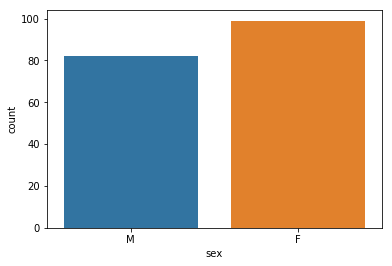

In [117]:
sns.countplot(davis_df['sex']);

Not uniform distribution. Count of both the attributes are not the same.

### 3. Geometric and Probabilistic view

For this part, we will restrict to repwt and repht attributes in the davis dataset as we can only visualize 2D space.

In [118]:
davis_df_new = davis_df[['repwt','repht']]

In [119]:
davis_df_new.head()

,repwt,repht
0,77.0,180.0
1,51.0,159.0
2,54.0,158.0
3,70.0,175.0
4,59.0,155.0


<span style="color:red">**Question 3a:** </span> Show the Geometric view of this new row normalized data on a 2D space along with the mean. 

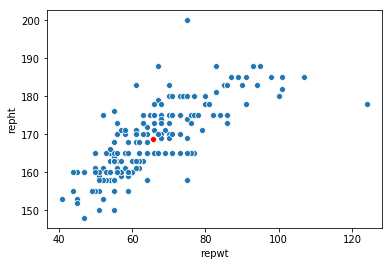

In [120]:
fig, ax = plt.subplots()
sns.scatterplot(x='repwt',y='repht',data=davis_df_new,ax=ax)
mu = np.mean(davis_df_new.values,0)
sns.scatterplot(x=[mu[0], mu[0]],y=[mu[1], mu[1]],color='r',ax=ax)

In [121]:
from pandas.api.types import is_numeric_dtype

for col in davis_df.columns:
    if is_numeric_dtype(davis_df[col]):
        print('%s:' % (col))
        print('\t Variance = %.2f' % davis_df[col].var())

weight:
	 Variance = 235.35
height:
	 Variance = 151.59
repwt:
	 Variance = 191.39
repht:
	 Variance = 88.26


We will further normalize the magnitude of each row in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_row_norm.

In [122]:
from sklearn.preprocessing import normalize
davis_df_new_row_norm = normalize(davis_df_new, axis=1, norm='l2')

In [123]:
davis_df_new_row_norm[1:10,:]

array([[0.30542755, 0.95221532],
       [0.32340548, 0.94626048],
       [0.37139068, 0.92847669],
       [0.35574458, 0.93458322],
       [0.41835989, 0.90828134],
       [0.42288547, 0.90618314],
       [0.37582461, 0.92669081],
       [0.37595091, 0.92663958],
       [0.35232976, 0.93587592]])

<span style="color:red">**Question 3b:** </span> Show the Geometric view of this new row normalized data on a 2D space along with the mean. Comment on the Geomateric view of the data in comparison to the view you observed in Question 3a. Provide a reason for the difference in the geometric views in Question 3a and 3b.

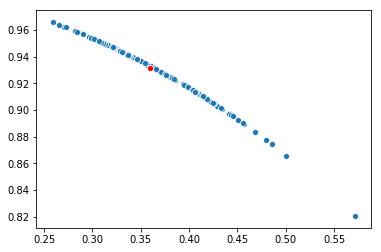

In [124]:
fig, ax = plt.subplots()
sns.scatterplot(x=davis_df_new_row_norm[:,0],y=davis_df_new_row_norm[:,1])
mu = np.mean(davis_df_new_row_norm,0)
sns.scatterplot(x=[mu[0], mu[0]],y=[mu[1], mu[1]],color='r',ax=ax)

For unnormalised data, the data points are all scattered in a way that we can't find a proper correlation between them. For normalised data, the curve appears to be very stright forward depicting the corelation between the attributes. Also the points are close to the mean.

<span style="color:red">**Question 3c:** </span> Show the Probabilistic view of the data davis_df_new.

In [125]:

from scipy.stats import multivariate_normal

mu = np.mean(davis_df_new.values,0)
Sigma = np.cov(davis_df_new.values.transpose())

min_length = np.min(davis_df_new.values[:,0]);
min_width = np.min(davis_df_new.values[:,1]);
max_length = np.max(davis_df_new.values[:,0]);
max_width = np.max(davis_df_new.values[:,1]);
x, y = np.mgrid[min_length:max_length:50j, min_width:max_width:50j]

positions = np.empty(x.shape + (2,))
positions[:, :, 0] = x; 
positions[:, :, 1] = y


F = multivariate_normal(mu, Sigma)
Z = F.pdf(positions)


Text(0.5,1,'Probabilistic view')

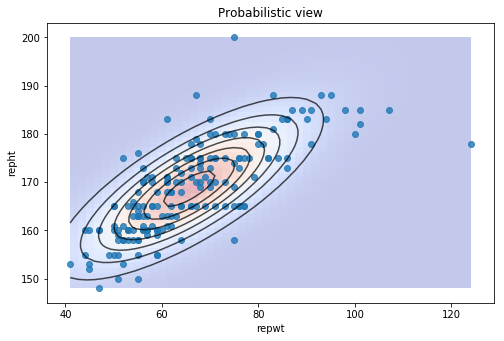

In [126]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[min_length,max_length, min_width,max_width], alpha=0.3)
cset = ax.contour(x, y, Z, colors='k', alpha=0.7)
plt.scatter(davis_df_new.values[:,0],davis_df_new.values[:,1],alpha=0.8)
ax.set_xlabel('repwt')
ax.set_ylabel('repht')
plt.title('Probabilistic view')

We will normalize the magnitude of each column in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_col_norm.

In [127]:
davis_df_new_col_norm = normalize(davis_df_new, axis=0, norm='l2')

In [128]:
davis_df_new_col_norm[1:10,:]

array([[0.05648398, 0.06996539],
       [0.05980657, 0.06952536],
       [0.07752703, 0.07700594],
       [0.06534421, 0.06820526],
       [0.08417221, 0.0726056 ],
       [0.08527974, 0.0726056 ],
       [0.08084962, 0.07920611],
       [0.07863456, 0.07700594],
       [0.07088186, 0.07480577]])

<span style="color:red">**Question 3d:** </span> Show the Probabilistic view of the data davis_df_new_col_norm. Compare the shape of the covariance structure in the Gaussian distribution with that of Question 3c and comment if column normalization has affected the shape of the covariance structure.

In [129]:
from scipy.stats import multivariate_normal

mu = np.mean(davis_df_new_col_norm,0)
Sigma = np.cov(davis_df_new_col_norm.transpose())

min_length = np.min(davis_df_new_col_norm[:,0]);
min_width = np.min(davis_df_new_col_norm[:,1]);
max_length = np.max(davis_df_new_col_norm[:,0]);
max_width = np.max(davis_df_new_col_norm[:,1]);
x, y = np.mgrid[min_length:max_length:50j, min_width:max_width:50j]

positions = np.empty(x.shape + (2,))
positions[:, :, 0] = x; 
positions[:, :, 1] = y

F = multivariate_normal(mu, Sigma)
Z = F.pdf(positions)

Text(0.5,1,'Probabilistic view')

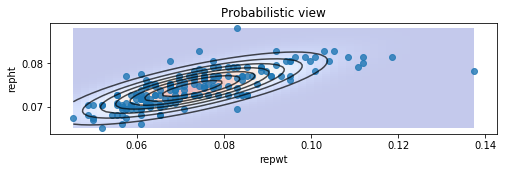

In [130]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[min_length,max_length, min_width,max_width], alpha=0.3)
cset = ax.contour(x, y, Z, colors='k', alpha=0.7)
plt.scatter(davis_df_new_col_norm[:,0],davis_df_new_col_norm[:,1],alpha=0.8)
ax.set_xlabel('repwt')
ax.set_ylabel('repht')
plt.title('Probabilistic view')



Yes it has affected the structure. Probablistic view of original data depicts the covariance. And the normalised data represents corelation between the attributes repwt and repht and the points are noe much closer to each other. 

### 4. Understanding the (in)dependencies among attributes using Covariance matrix

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

<span style="color:red">**Question 4a:** </span> What is the covariance matrix?

In [131]:
davis_df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [132]:
davis_df.cov()

,weight,height,repwt,repht
weight,235.346041,29.136065,177.292357,91.004665
height,29.136065,151.587047,102.833180,85.497729
repwt,177.292357,102.833180,191.385635,99.017403
repht,91.004665,85.497729,99.017403,88.259791


<span style="color:red">**Question 4b:** </span> Which pairs of attributes co-vary in the opposite direction?

None

<span style="color:red">**Question 4c:** </span> Which pairs of attributes are highly correlated?

In [133]:
print('Correlation:')
davis_df.corr()

Correlation:


,weight,height,repwt,repht
weight,1.000000,0.154258,0.835376,0.631435
height,0.154258,1.000000,0.603737,0.739166
repwt,0.835376,0.603737,1.000000,0.761860
repht,0.631435,0.739166,0.761860,1.000000


weight and repwt
repht and repwt
height and repht

<span style="color:red">**Question 4d:** </span> Which pairs of attributes are uncorrelated?

height and weight

<span style="color:red">**Question 4e:** </span> What information did you gather from a correlation matrix that is not available in a covariance matrix?

 Covariance gives us the trend but correlation tells us how strongly they are related.

### 5. Dimensionality Reduction: Feature Selection

**Data:** Iris dataset from the practice notebook. (https://raw.githubusercontent.com/plotly/datasets/master/iris.csv)

**Assumption:** Assume that your goal is to cluster the data to identify the species 'Name'. Clustering algorithm takes as input data points and attributes. It groups points that are similar to each other into a separate cluster. It puts points that are dissimilar in different cluster. Note that the 'Name' attribute will be hidden from the clustering algorithm.

In [134]:
import seaborn as sns
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')


<span style="color:red">**Question 5a:** </span> If you are allowed to select only one attribute, which attribute would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

Petal Width.. Because the histogram in the pairplot seperates data in a reasonable manner corresponding to atleast 70% accuracy. We can also consider Petal length.

<span style="color:red">**Question 5b:** </span> If you are allowed to select only two features, which feature would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

Petal Length and Petal Width.. scatterplot shows that the data is fairly seperated using these 2 attributes.

<span style="color:red">**Question 5c:** </span>In real-world problems ground-truth (types of iris plants) will not be available to select the features, how do you perform **feature selection** in that case? 

We'll pairplot with individual attributes and observing those points, we determine how they can be clustered.

<span style="color:red">**Question 5d:** </span>In real-world problems ground-truth (types of iris plants) will not be available to select the features, how do you perform **dimensionality reduction** in that case? What limitations does your approach have?

PCA is applicable in such cases of unsupervised data provided the data set is a linear one. 

### 6. Dimensionality Reduction: PCA on Iris Data

<span style="color:red">**Question 6a:** </span> Perform PCA on Iris dataset and project the data onto the first two principal components. Use the attributes 'SepalLength','SepalWidth','PetalLength', and 'PetalWidth'. 

Hint: Use iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']] to use the specified attributes.

In [135]:
data=iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']]

In [136]:
mean=np.mean(data, axis=0)

In [137]:
xc=data-mean

In [138]:
xc_t=xc.T

In [139]:
n=data.shape[0]

In [140]:
cov=np.dot(xc_t,xc)/(n-1)

In [141]:
np.allclose(cov,data.cov())

True

In [142]:
w,v = np.linalg.eig(cov)

In [143]:
sum(w[:2])/sum(w)

0.9776317750248035

In [144]:
pc=v[:,:2]; pc.shape

(4, 2)

In [145]:
p_data=np.dot(data,pc)

In [146]:
p_data.shape

(150, 2)

In [147]:
pca_data=pd.DataFrame(p_data)

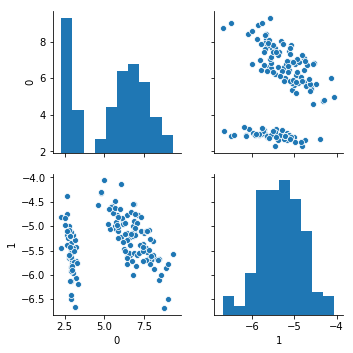

In [148]:
sns.pairplot(pca_data)

<span style="color:red">**Question 6b:** </span> Generate a pairplot (along with colors for the different types of iris plants) between the two newly generated features using PCA in the above step.

In [149]:
p_columns = {'pc1': p_data[:, 0].tolist(), 'pc2': p_data[:, 1].tolist(), 'Name': iris_df['Name']}
p_data_df=pd.DataFrame(p_columns)

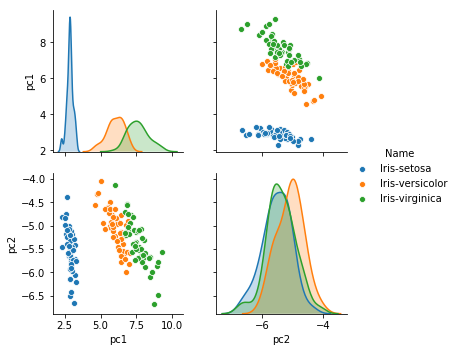

In [150]:
sns.pairplot(p_data_df, hue='Name')

<span style="color:red">**Question 6c:** </span> From the above pairplot, if only one newly generated attribute were to be used for clustering the data which newly generated attribute is best suited. Provide a reason. Is the newly generated attribute better than the feature selected in Question 4a?

pc-1 is the best suited for feature selection because it spread over the entire data. Newly generated attribute is not better than the feature selection in Question 4a. Both the plots are same.

<span style="color:red">**Question 6d:** </span> From the above pairplot, if two newly generated attributes were to be used for clustering the data, are the two newly generated attributes better than the features selected in Question 4b?

 Newly generated attributes are not better than the features selected. 

### 7. Dimensionality Reduction: PCA on synthetic datasets

Consider the following synthetic dataset we refer to as **Blobs**. This dataset has 500 data points centered around (-5, -5), (0,0) and (5,5). This dataset has 1500 data points and 2 attributes.

In [151]:
n_samples = 1500
random_state = 42
centers = [(-5, -5), (0, 0), (5, 5)]
Blobs_X, Blobs_y = datasets.make_blobs(n_samples=n_samples,centers=centers,random_state=random_state)

In [152]:
Blobs_X.shape

(1500, 2)

Text(0.5,1,'Blobs')

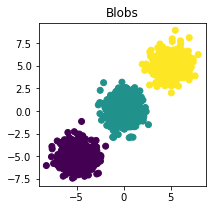

In [153]:
plt.figure(figsize=(3,3))
plt.scatter(Blobs_X[:, 0], Blobs_X[:, 1], c= Blobs_y)
plt.title('Blobs')


We generated a new dataset **Blobs1** by adding an extra attribute to this 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 1.

In [154]:
Blobs1= pd.DataFrame(Blobs_X)
Blobs1['2'] = np.random.randn(1500)
Blobs1.head()

,0,1,2
0,0.168461,1.317598,-0.929719
1,-3.534351,-5.225776,1.049140
2,-6.525525,-5.691908,1.820912
3,-0.120948,0.419532,0.211488
4,-5.469474,-4.457440,0.876157


We generated a new dataset **Blobs2** by adding an extra attribute to the 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 100. Read more about how to do this at https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html.

In [155]:
Blobs2= pd.DataFrame(Blobs_X)
Blobs2['2'] = np.random.randn(1500)*10
Blobs2.head()

,0,1,2
0,0.168461,1.317598,-17.636641
1,-3.534351,-5.225776,3.776475
2,-6.525525,-5.691908,1.859627
3,-0.120948,0.419532,-8.336766
4,-5.469474,-4.457440,3.339377


We generated a new dataset **Blobs3** by adding two extra attributes to the 2D Blobs dataset. The values for the two new attributes are drawn from a normal distribution with mean 0 and variance 100. 

In [156]:
Blobs3= pd.DataFrame(Blobs_X)
Blobs3['2'] = np.random.randn(1500)*10
Blobs3['3'] = np.random.randn(1500)*10
Blobs3.head()

,0,1,2,3
0,0.168461,1.317598,-20.635072,0.207926
1,-3.534351,-5.225776,12.410867,-1.455778
2,-6.525525,-5.691908,0.346088,2.479292
3,-0.120948,0.419532,-15.716400,-3.670843
4,-5.469474,-4.457440,1.044643,-2.804445


<span style="color:red">**Question 7a:** </span> Plot pairplot for **Blobs1** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

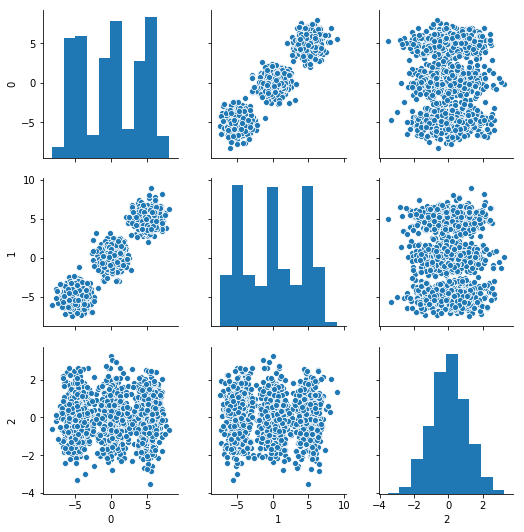

In [157]:
sns.pairplot(Blobs1)

Variance of the third attribute is very less when compared to the other attributes. Also data doesn't follow a linear trend for third attribute whereas for the first two,it's linear trend.

<span style="color:red">**Question 7b:** </span> Perform PCA on **Blobs1** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [158]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(Blobs1)
print(Blobs1.shape)
print(projected.shape)    
p_df=pd.DataFrame(projected)

(1500, 3)
(1500, 2)


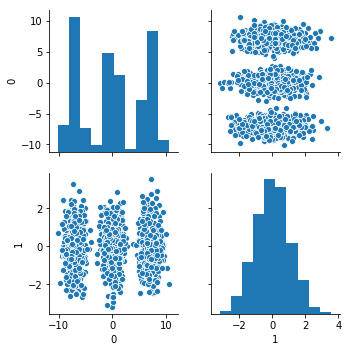

In [159]:
sns.pairplot(p_df)

<span style="color:red">**Question 7c:** </span> By comparing the distributions for the newly generated attributes in Question 7b with the previous pairplot in Question 7a, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Provide a reason for your observations.

PC-1 captures the attributes 0,1 whereas the PC-2 captures attribute 2. 

<span style="color:red">**Question 7d:** </span> Plot pairplot for **Blobs2** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

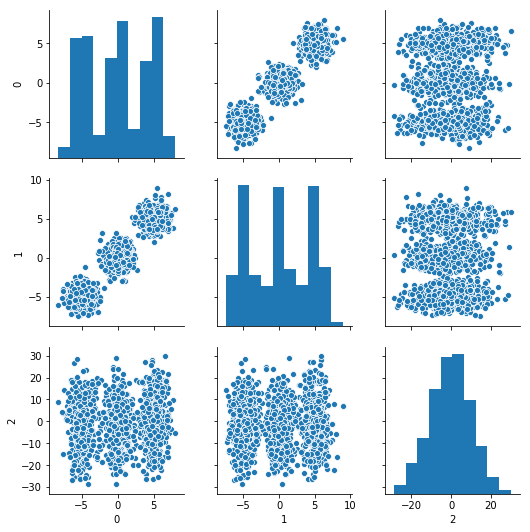

In [160]:
sns.pairplot(Blobs2)

Variance of the third attribute is much higher compared to first two.

<span style="color:red">**Question 7e:** </span> Perform PCA on **Blobs2** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [161]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected2 = pca.fit_transform(Blobs2)
print(Blobs2.shape)
print(projected.shape)    
p_Data2=pd.DataFrame(projected2)

(1500, 3)
(1500, 2)


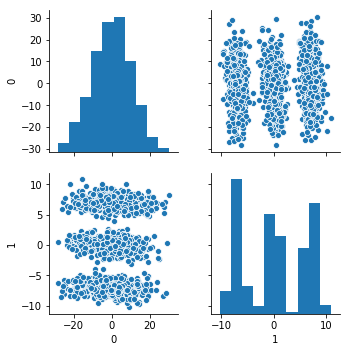

In [162]:
sns.pairplot(p_Data2)

<span style="color:red">**Question 7f:** </span> By comparing the distributions for the newly generated attributes in Question 7e with the previous pairplot in Question 7d, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7c)?

PC-1 captures attribute-2 and PC-2 captures attributes 0,1. Since attribute-2 has most variance when compared to the other attributes and hence PC-1 represents attribute-2

<span style="color:red">**Question 7g:** </span> Are the three blobs separately visible after projection based on PCA in Question 7e?

Yes. 

<span style="color:red">**Question 7h:** </span> Plot pairplot for **Blobs3** data. By visually examining this plot, comment on the strength of the correlation between the first two attributes. Also, comment on the strength of the correlation between the second two attributes.

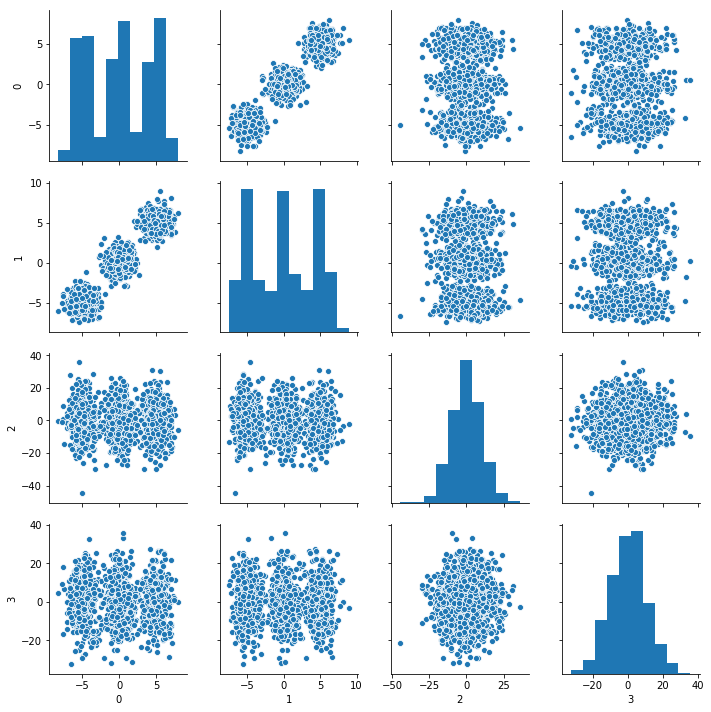

In [163]:
sns.pairplot(Blobs3)

First two attributes are positively correlated. Second two attributes are not correlated.

<span style="color:red">**Question 7i:** </span> Perform PCA on **Blobs3** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [164]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(Blobs3)
print(Blobs3.shape)
print(projected.shape) 
p_Data=pd.DataFrame(projected)

(1500, 4)
(1500, 2)


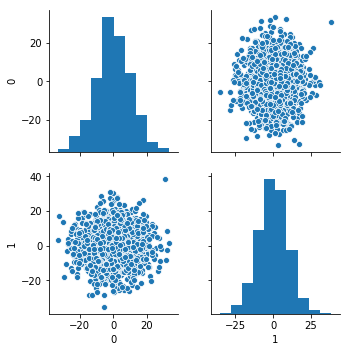

In [165]:
sns.pairplot(p_Data)

<span style="color:red">**Question 7j:** </span>  By comparing the distributions for the newly generated attributes in Question 7i with the previous pairplot in Question 7h, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7f and 7c)?

PC-1 captures last two attributes(2,3). PC-2 captures first two attributes(0,1). Variance along the last two is high compared to the first 2 attributes. 

<span style="color:red">**Question 7k:** </span>  Are the three blobs separately visible after projection based on PCA in Question 7i? What would have caused this, in comparison to your observation in Question 7g?

No. Attributes 2,3 captures high variance and which are not correlated to each other. Also they are not in a linear trend. And PCA fails here.

<span style="color:red">**Question 7l:** </span>  What limitation of PCA do your observations in Questions 7j, 7f, and 7c highlight?

PCA doesn't hold good for non linear data sets.

### 8. Singular Value Decomposition

<span style="color:red">**Question 8a:** </span> Using the code provided in the practice notebook for computing PCA, write your own SVD function (U,S,V = mysvd(A)) to factorize the matrix A into U,S, and V.

In [166]:
def mysvd(A):
    S_points = np.dot(A, A.T)
    A_c = A-np.mean(A, axis= 0)
    S_attributes = np.dot(A_c.T, A_c)/(A.shape[0])
   
    ## U and delta
    w, U = np.linalg.eigh(S_points)
    w_id = w.argsort()[::-1]  
    w = w[w_id]
    U = U[:, w_id]
    diagonal = np.nonzero(w)
    w_diagonal = w[diagonal].copy()
    w_diagonal=np.diag(w_diagonal)
    print w_diagonal.shape
    S = np.zeros_like(A).astype(np.float64)
    print S.shape
    S[:w_diagonal.shape[0],:w_diagonal.shape[1]] = w_diagonal[:A.shape[0], :A.shape[1]]
   
    ## V
    W, V = np.linalg.eigh(S_attributes)
    W_id = W.argsort()[::-1]  
    W = W[W_id]
    V = V[:,W_id]
   
    return U, S, V

<span style="color:red">**Question 8b:** </span> Demonstrate that your code is correct by using your function on the following matrix $A$ and showing that the product $USV^T=A$.

In [167]:
A = np.array([
    [1, 1, 1, 0, 0, 0],
    [3, 3, 3, 0, 0, 0],
    [4, 4, 4, 0, 0, 0],
    [5, 5, 5, 0, 0, 0],
    [0, 1, 0, 4, 4, 1],
    [0, 0, 0, 5, 5, 2],
    [0, 0, 0, 2, 2, 2]])

In [168]:
U,S,V=mysvd(A)
X = np.dot(np.dot(U,S),V.T)
X

(7, 7)
(7, 6)


array([[ 10.08252901,   9.36977829,  10.08252901,  -8.77452523,
         -8.77452523,  -3.86107322],
       [ 30.24758702,  28.10933487,  30.24758702, -26.32357568,
        -26.32357568, -11.58321966],
       [ 40.33011603,  37.47911316,  40.33011603, -35.09810091,
        -35.09810091, -15.44429288],
       [ 50.41264504,  46.84889146,  50.41264504, -43.87262614,
        -43.87262614, -19.3053661 ],
       [-14.71226931, -17.58064875, -14.71226931, -35.36358215,
        -35.36358215,  -7.20091441],
       [-22.67316168, -27.1500611 , -22.67316168, -41.53043017,
        -41.53043017,  -6.41688403],
       [ -9.8641648 , -12.35210356,  -9.8641648 , -18.63786656,
        -18.63786656,  -1.44288033]])

In [169]:
np.allclose(A,X,rtol=3)

True

<span style="color:red">**Question 8c:**</span> Perform SVD on iris dataset and visualize the proportion of variance captured by each spectral value. List the dimensions that captures less than 10% of the total variance.

In [170]:
import pandas as pd
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [171]:
data = iris_df.values[:,0:4]
data = data.astype(float) #converts data format from object to numeric

In [172]:
U, S, V = svd(data, full_matrices = False)

In [173]:
S

array([95.95066751, 17.72295328,  3.46929666,  1.87891236])

Text(0,0.5,'variance covered')

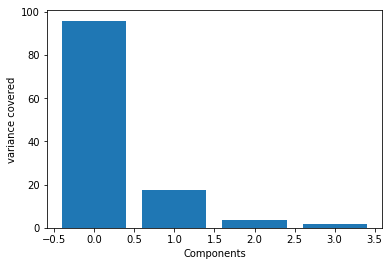

In [175]:
plt.bar(np.arange(4),S)
plt.xlabel('Components')
plt.ylabel('variance covered')

In [108]:
s0_percentage, s1_percentage, s2_percentage, s3_percentage = S[0]/(sum(S)) , S[1]/sum(S) , S[2]/sum(S) , S[3]/sum(S)
s0_percentage, s1_percentage, s2_percentage, s3_percentage

(0.8061602452168879,
 0.14890506477534202,
 0.029148406386584953,
 0.015786283621185112)

attribute - 2,3 are capturing less variance (<10%)

<span style="color:red">**Question 8d:**</span> The heatmap of the full data is shown below. Plot all the four spectral decomposition matrices based on SVD.

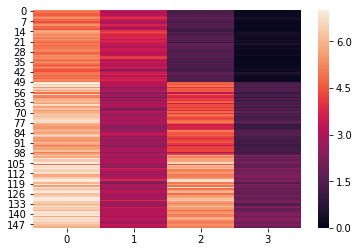

In [109]:
sns.heatmap(data,vmin=0, vmax=7)

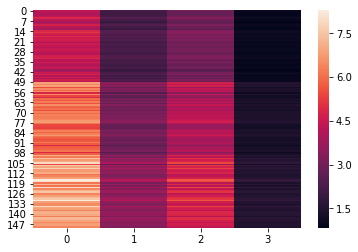

In [114]:
sns.heatmap(S[0]*np.outer(U[:,0],V[0,:]))

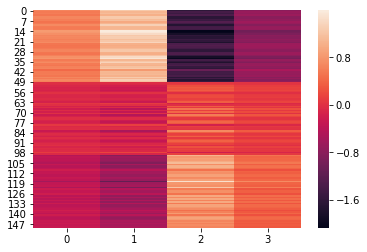

In [115]:
sns.heatmap(S[1]*np.outer(U[:,1],V[1,:]))

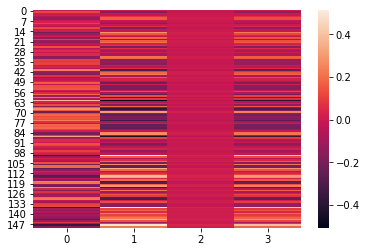

In [118]:
sns.heatmap(S[2]*np.outer(U[:,2],V[2,:]))

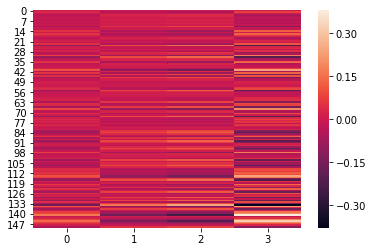

In [119]:
sns.heatmap(S[3]*np.outer(U[:,3],V[3,:]))

<span style="color:red">**Question 8e:**</span> Visually examine the magnitude of values present in each of the four spectral decomposition matrices and comment on which two of the four matrices have elements with relatively small magnitude in them. Provide a reason for this based on your obsevation in Question 8c. 

 Last two gives the samll magnitude ranging from (-0.4,0.4) and (-0.3,0.3). Variance depicted in 8c for these attributes are relatively smaller which indicates that spectral decomposition is also has small magnitude compared to the other two.

### 9. Linear Discriminant Analysis

We will use digits data for studying the use of LDA.

In [68]:
digits = load_digits()

The data with 1797 samples and 64 attributes is in the object digits.data. These 64 attributes represent pixels in an 8x8 image.

In [69]:
digits.data.shape

(1797, 64)

The 1797 images are digits from 0...9. This information is in the digits.target variable.

In [70]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

For this part, we will only focus on digits 3 and 8. To this end, we generate indices of 183 samples with 3s and indices of 174 samples with 8s.

In [71]:
Threes = np.where(digits.target==3)
Eights = np.where(digits.target==8)
[np.size(Threes), np.size(Eights)]

[183, 174]

We will take samples from these indices and construct a matrix X such that the first 183 samples represent 3s and the remaining ones represent 8s. The variable y captures this information.

In [72]:
indices = np.hstack((Threes[0], Eights[0]));
X = digits.data[indices,:]
y = np.hstack((3*np.ones(np.size(Threes)), 8*np.ones(np.size(Eights))))

In [73]:
X

array([[ 0.,  0.,  7., ...,  9.,  0.,  0.],
       [ 0.,  2.,  9., ..., 11.,  0.,  0.],
       [ 0.,  1.,  8., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [74]:
X.shape

(357, 64)

In [75]:
y

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8.

In [77]:
y[...,None].shape

(357, 1)

<span style="color:red">**Question 9a:**</span> Visually examine the following heatmap of the data X and identify one attribute that can separate the 3s from 8s. Also comment on (approximately) how many mistakes would be committed if this attribute is used for projection in LDA.

[Text(159,0.5,'Samples'), Text(0.5,69,'Attributes')]

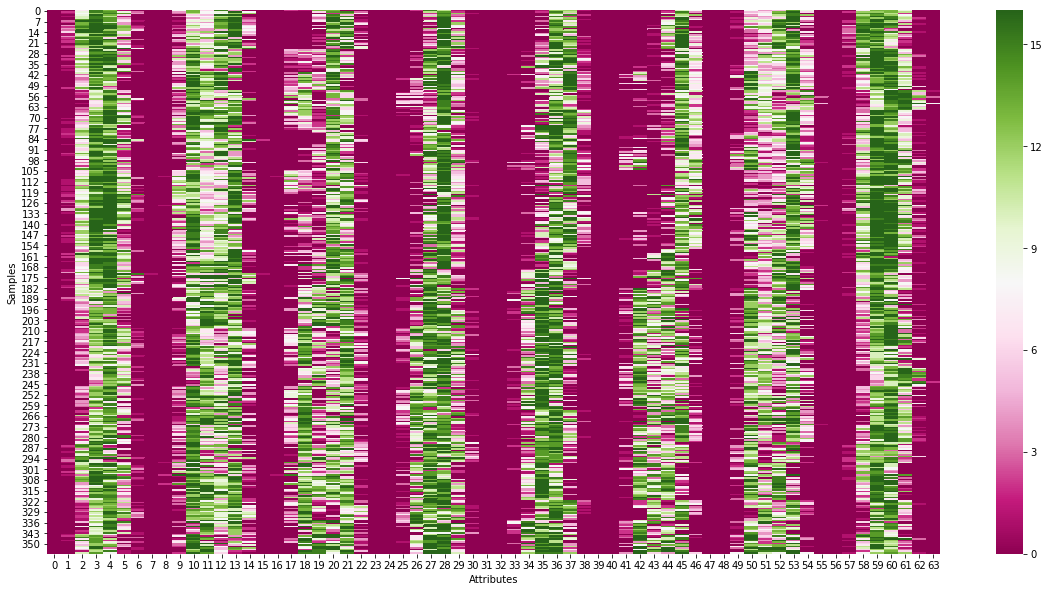

In [78]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')

There are many attributes which can seperate 3s from 8s with significant count of mistakes. I consider attribute-42 to be the best approximation that can classify with mistakes being 27-30.

<span style="color:red">**Question 9b:**</span> Perform LDA on this data. Plot the heatmap of the projected data and comment how many points will be wrongly predicted based on this projection.

In [122]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[Text(159,0.5,'Samples'), Text(0.5,69,'Attributes')]

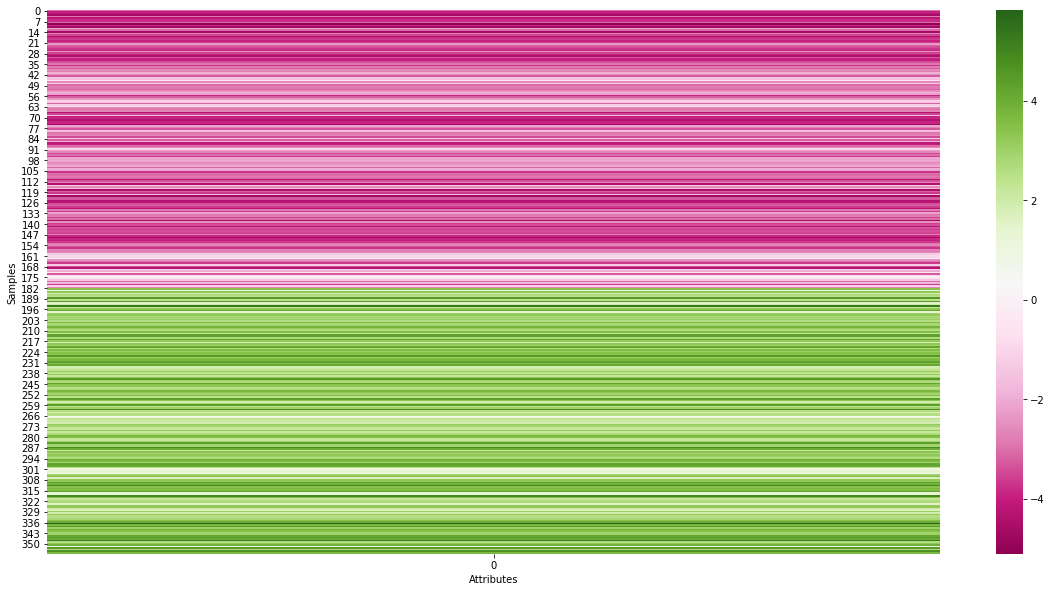

In [124]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X_lda,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')

None of the points are wrongly predicted. 3s and 8s are seperated in a good manner and I don't find any mistakes.